In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)

# from matplotlib import style
# style.use('dark_background')

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [8]:
path_by_country = r"data-society-global-climate-change\Data_GlobalLandTemperatures_2023\GlobalLandTemperaturesByCountry.csv"
path_by_city = r"data-society-global-climate-change\Data_GlobalLandTemperatures_2023\GlobalLandTemperaturesByMajorCity.csv"
path_by_state = r"data-society-global-climate-change\Data_GlobalLandTemperatures_2023\GlobalLandTemperaturesByState.csv"
path_global_tmpr = r"data-society-global-climate-change\Data_GlobalLandTemperatures_2023\GlobalTemperatures.csv"

df0_cntry = pd.read_csv(path_by_country)
df0_city = pd.read_csv(path_by_city)
df0_state = pd.read_csv(path_by_state)
df0_tmpr = pd.read_csv(path_global_tmpr)

In [9]:
df_cntry = df0_cntry.copy()
df_city = df0_city.copy()
df_state = df0_state.copy()
df_tmpr = df0_tmpr.copy()

In [10]:
df_cntry.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [11]:
df_city.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [12]:
df_state.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [13]:
df_tmpr.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_cntry.shape, df_city.shape, df_state.shape, df_tmpr.shape

((577462, 4), (239177, 7), (645675, 5), (3192, 9))

In [31]:
df_cntry.isna().sum() / df_cntry.shape[0] * 100

dt                              0.000
AverageTemperature              5.654
AverageTemperatureUncertainty   5.526
Country                         0.000
dtype: float64

In [32]:
df_city.isna().sum() / df_city.shape[0] * 100

dt                              0.000
AverageTemperature              4.600
AverageTemperatureUncertainty   4.600
City                            0.000
Country                         0.000
Latitude                        0.000
Longitude                       0.000
dtype: float64

In [33]:
df_state.isna().sum() / df_state.shape[0] * 100

dt                              0.000
AverageTemperature              3.972
AverageTemperatureUncertainty   3.972
State                           0.000
Country                         0.000
dtype: float64

In [34]:
df_tmpr.isna().sum() / df_tmpr.shape[0] * 100

dt                                           0.000
LandAverageTemperature                       0.376
LandAverageTemperatureUncertainty            0.376
LandMaxTemperature                          37.594
LandMaxTemperatureUncertainty               37.594
LandMinTemperature                          37.594
LandMinTemperatureUncertainty               37.594
LandAndOceanAverageTemperature              37.594
LandAndOceanAverageTemperatureUncertainty   37.594
dtype: float64

In [35]:
def info(df):
    # Anzahl der Zeilen im Total
    print(f'\n\033[1mTotal Zeilen :\033[0m {df.shape[0]} \n')  # \033[1m {your_text} \033[0m : makes your_text bold

    # Anzahl der Spalten im Total
    print(f'\n\033[1mTotal Spalten :\033[0m {df.shape[1]} \n')

    # Extrahieren der Spaltennamen
    spaltenname = df.columns
    print(f'\n\033[1mSpaltennamen:\033[0m ' + f'{spaltenname} \n')

    # Anzahl der Duplikaten im Total
    duplikaten = df.duplicated().sum()
    print(f'\n\033[1mDuplikaten:\033[0m ' + f'{duplikaten} \n')

    # Überblick der Daten
    print(f'\033[1mÜberblick der Daten:\033[0m\n')
    infos = df.info()

    # Gesamtnullwerte nach jeder Kategorie
    nullwerte = df.isnull().sum()
    print(f'\n\033[1mNullwerte\033[0m\n' + f'{nullwerte} \n')

    # Beschreibende Statistik Object Spalten
    describe = df.describe(include="O").T
    print(f'\n\033[1mBeschreibende Statistik:\033[0m\n' + f'{describe} \n')

In [36]:
info(df_cntry)


Total Zeilen : 577462 


Total Spalten : 4 


Spaltennamen: Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object') 


Duplikaten: 0 

Überblick der Daten:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB

Nullwerte
dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64 


Beschreibende Statistik:
          count unique         top  freq
dt       577462   3239  

In [37]:
info(df_city)


Total Zeilen : 239177 


Total Spalten : 7 


Spaltennamen: Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object') 


Duplikaten: 0 

Überblick der Daten:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB

Nullwerte
dt                               

In [38]:
info(df_state)


Total Zeilen : 645675 


Total Spalten : 5 


Spaltennamen: Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object') 


Duplikaten: 0 

Überblick der Daten:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB

Nullwerte
dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                

In [39]:
info(df_tmpr)


Total Zeilen : 3192 


Total Spalten : 9 


Spaltennamen: Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object') 


Duplikaten: 0 

Überblick der Daten:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty            

In [41]:
df_cntry['dt'] = pd.to_datetime(df_cntry['dt'], dayfirst=True)
df_city['dt'] = pd.to_datetime(df_city['dt'], dayfirst=True)
df_state['dt'] = pd.to_datetime(df_state['dt'], dayfirst=True)
df_tmpr['dt'] = pd.to_datetime(df_tmpr['dt'], dayfirst=True)

In [42]:
df_cntry

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [44]:
df_cntry[df_cntry["Country"] == "Turkey"]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
533683,1777-02-01,3.000,3.314,Turkey
533684,1777-03-01,NaN,NaN,Turkey
533685,1777-04-01,7.678,2.553,Turkey
533686,1777-05-01,15.293,3.189,Turkey
533687,1777-06-01,18.661,2.993,Turkey
...,...,...,...,...
536518,2013-05-01,17.522,0.360,Turkey
536519,2013-06-01,20.862,0.240,Turkey
536520,2013-07-01,23.335,0.281,Turkey
536521,2013-08-01,23.839,0.306,Turkey


In [45]:
df_city[df_city["Country"] == "Turkey"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11896,1755-04-01,NaN,NaN,Ankara,Turkey,39.38N,33.29E
11897,1755-05-01,NaN,NaN,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E
96621,2013-08-01,27.430,0.220,Izmir,Turkey,37.78N,26.44E


In [48]:
df_state[df_state["Country"] == "Turkey"]

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country


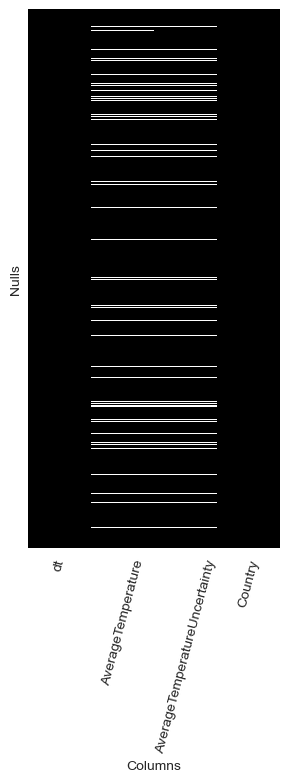

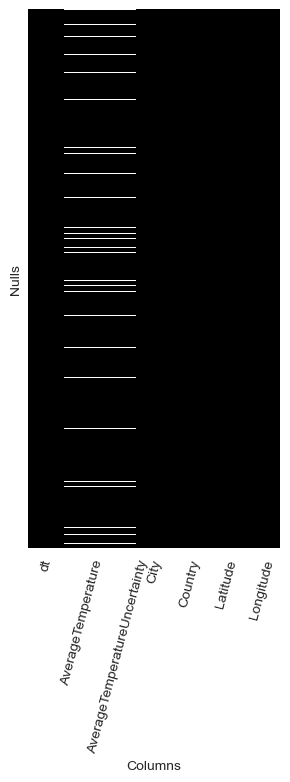

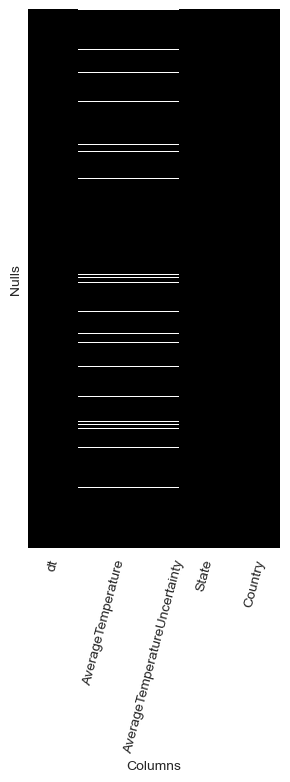

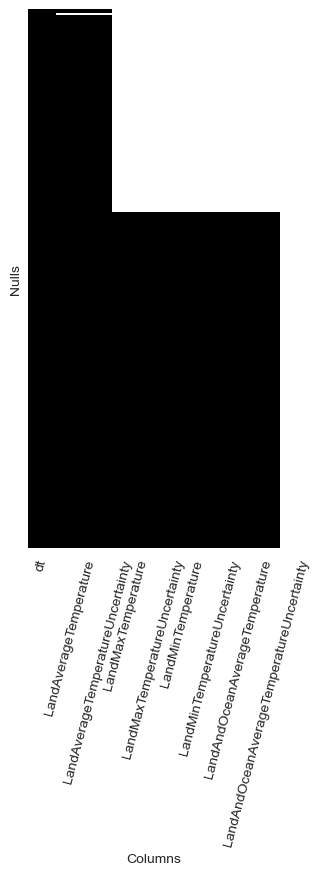

In [75]:
df_list = [df_cntry, df_city, df_state, df_tmpr]
cmap = plt.cm.get_cmap("gray")

for i in range(1, 5):
    plt.figure(figsize=(15, 7))
        
    plt.subplot(1, 4, i)
    # plt.title(f"{df_list[i-1]} Nulls", y=1.005)
    sns.heatmap(df_list[i-1].isna(), yticklabels=False, cbar=False, cmap=cmap)
    plt.xticks(rotation=75)
    
    plt.xlabel("Columns")
    plt.ylabel("Nulls")
    plt.tight_layout()
    plt.show()

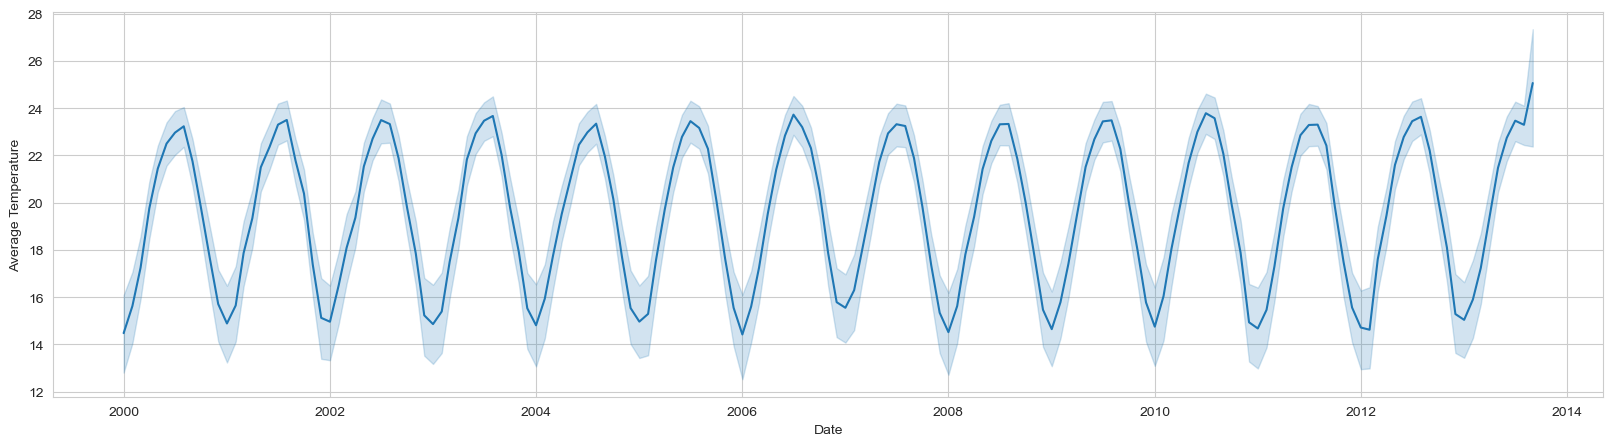

In [81]:
plt.figure(figsize=(20, 5))

data = df_cntry[df_cntry["dt"] >= "2000-01-01"]
sns.lineplot(x="dt", y="AverageTemperature", data=data);
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.ticklabel_format(style="plain", axis="y")

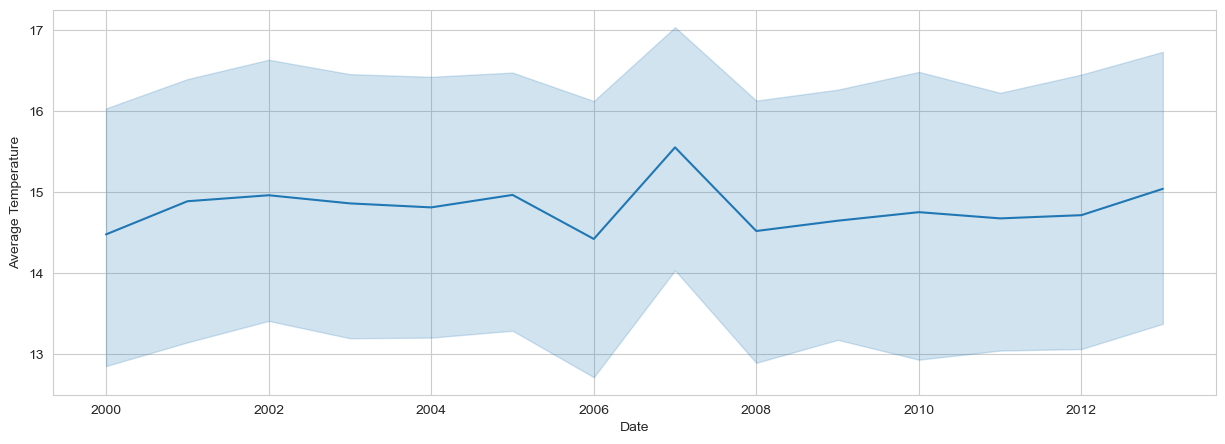

In [82]:
plt.figure(figsize=(15, 4))

data = df_cntry[df_cntry["dt"] >= "2000-01-01"]
data = data[data['dt'].dt.month == 1]
sns.lineplot(x="dt", y="AverageTemperature", data=data);
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.ticklabel_format(style="plain", axis="y")

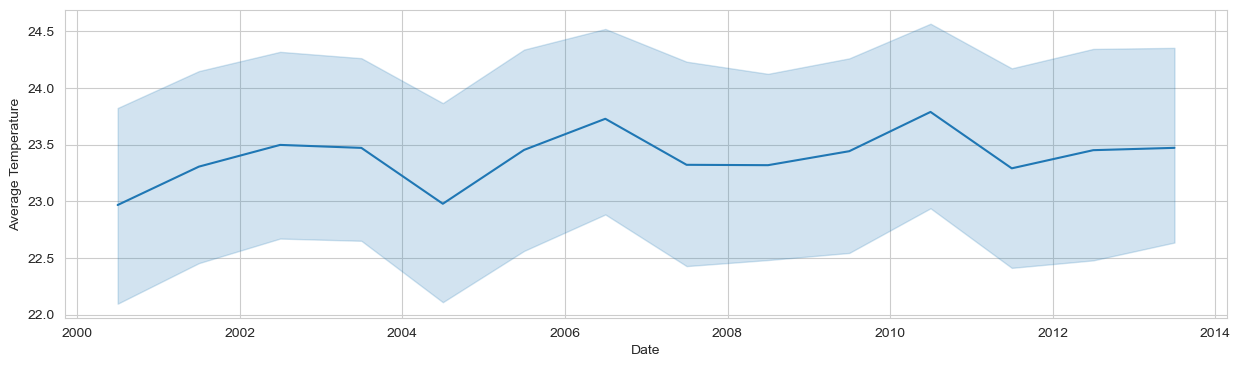

In [86]:
plt.figure(figsize=(15, 4))

data = df_cntry[df_cntry["dt"] >= "2000-01-01"]
data = data[data['dt'].dt.month == 7]
sns.lineplot(x="dt", y="AverageTemperature", data=data);
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.ticklabel_format(style="plain", axis="y")